## Importing libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import AUC, Accuracy
from tensorflow.keras.utils import to_categorical 

In [151]:
DATA_PATH = "cover_data.csv"
SEED=42

## Loading data

In [152]:
df = pd.read_csv(DATA_PATH)
features = df.drop(columns="class").columns
target = "class"
print(df.shape)
print(df.head)

(581012, 55)
<bound method NDFrame.head of         Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0   

In [153]:
print(df.columns)
print(df.info())

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [154]:
print("\nSummary Statistics of Numerical Features:")
print(df.describe())


Summary Statistics of Numerical Features:
           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                 

In [155]:
print("\nNumber of missing values :")
np.sum(np.sum(pd.isna(df)))


Number of missing values :


0

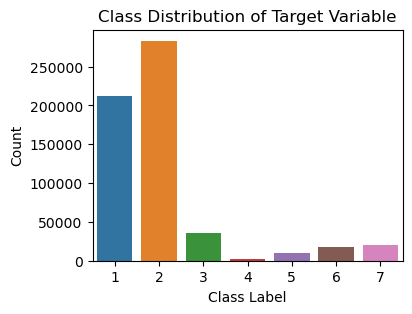

[5 2 1 7 3 6 4]


In [156]:
# Assuming the target column is 'target_column'
plt.figure(figsize=(4, 3))
sns.countplot(x='class', data=df)
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()
print(df['class'].unique())

## Splitting the data and normalizing

In [160]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED, stratify=y)

le = LabelEncoder()
print(y_train)
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



244336    2
518278    1
151614    2
85676     1
419952    1
         ..
19737     2
560290    2
126666    1
213959    1
52912     1
Name: class, Length: 406708, dtype: int64
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## Designing model

In [161]:
def design_model():
    model = Sequential()
    model.add(tf.keras.Input(shape=(54,)))
    model.add(tf.keras.layers.Dense(256, activation = "relu"))
    model.add(tf.keras.layers.Dense(128, activation = "relu"))
    model.add(tf.keras.layers.Dense(64, activation = "relu"))
    model.add(tf.keras.layers.Dense(64, activation = "relu"))
    model.add(tf.keras.layers.Dense(7, activation = "softmax"))
    model.compile(optimizer= Adam(learning_rate=0.01), loss= CategoricalCrossentropy(), metrics= [Accuracy(), AUC()])
    model.summary()
    return model
    
model = design_model()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,847 (233.78 KB)

 Trainable params: 59,847 (233.78 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
EPOCHs = 16
BATCH_SIZE = 32
model.fit(X_train,y_train, epochs=EPOCH, batch_size= BATCH_SIZE, validation_split=0.2, verbose=1)

Epoch 1/32
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.0012 - auc_10: 0.9582 - loss: 0.6746 - val_accuracy: 0.0157 - val_auc_10: 0.9713 - val_loss: 0.5596
Epoch 2/32
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 10s 976us/step - accuracy: 0.0267 - auc_10: 0.9695 - loss: 0.5784 - val_accuracy: 0.0401 - val_auc_10: 0.9735 - val_loss: 0.5379
Epoch 3/32
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.0500 - auc_10: 0.9720 - loss: 0.5521 - val_accuracy: 0.0675 - val_auc_10: 0.9718 - val_loss: 0.5587
Epoch 4/32
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 10s 959us/step - accuracy: 0.0870 - auc_10: 0.9724 - loss: 0.5505 - val_accuracy: 0.0854 - val_auc_10: 0.9743 - val_loss: 0.5240
Epoch 5/32
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 10s 950us/step - accuracy: 0.1039 - auc_10: 0.9742 - loss: 0.5287 - val_accuracy: 0.0875 - val_auc_10: 0.9735 - val_loss: 0.5355
Epoch 6/32
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 10s 933us/step - accuracy: 0.0830 - auc_10: 0.9693 - loss: 0.5773 - val_accuracy: 0.1154 - val_

In [163]:
print(model.evaluate(X_test, y_test, verbose=0))

[0.985765278339386, 0.0, 0.9014414548873901]


In [171]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis = 1)


# Print classification report (precision, recall, f1-score)
print(classification_report(y_true, y_pred))


# Confusion matrix
print(confusion_matrix(y_true, y_pred))


5447/5447 ━━━━━━━━━━━━━━━━━━━━ 2s 394us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     63552
           1       0.53      0.96      0.68     84991
           2       0.54      0.94      0.69     10726
           3       0.00      0.00      0.00       824
           4       0.00      0.00      0.00      2848
           5       0.00      0.00      0.00      5210
           6       0.00      0.00      0.00      6153

    accuracy                           0.53    174304
   macro avg       0.15      0.27      0.20    174304
weighted avg       0.29      0.53      0.37    174304

[[    0 63424   128     0     0     0     0]
 [    0 81915  3076     0     0     0     0]
 [    0   641 10085     0     0     0     0]
 [    0     0   824     0     0     0     0]
 [    0  2443   405     0     0     0     0]
 [    0  1216  3994     0     0     0     0]
 [    0  6127    26     0     0     0     0]]


/Users/victorchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/victorchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/victorchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le